In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline

import re

df = pd.read_csv('Pokemon.csv')

In [2]:
df = df.fillna('NaN')
df.columns = ['#','Name','Type1', 'Type2','Total' ,'HP', 'Bs.Atk','Bs.Def','Sp.Atk','Sp.Def','SP', 'Generation', 'Legendary']
df = df.set_index('#')
df.Name = df.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)',r'\2',x))
df.Name = df.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)',r'\2',x))
df.Name = df.Name.apply(lambda x: re.sub(r'(HoopaHoopa)(.+)','Hoopa'+r'\2',x))


df.head()

,Name,Type1,Type2,Total,HP,Bs.Atk,Bs.Def,Sp.Atk,Sp.Def,SP,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df['Primal'] = df['Name'].str.contains('Primal ') == True
df['Mega'] = df['Name'].str.contains('Mega ') == True

df['ATK'] = df['Bs.Atk'] + df['Sp.Atk']
df['DEF'] = df['Bs.Def'] + df['Sp.Def']
df.drop(columns=['Bs.Atk','Bs.Def','Sp.Atk','Sp.Def'], inplace=True)

df = df[['Name', 'Type1', 'Type2', 'Total', 'HP', 'SP', 'ATK', 'DEF', 'Generation',
       'Legendary', 'Primal', 'Mega']]

df.head()

# num_legendary = df.loc[(df['Legendary']==True)].shape[0]
# print("Legendary pokemons %f  %d %d" % (num_legendary*100.0/df.shape[0], num_legendary, df.shape[0]))

,Name,Type1,Type2,Total,HP,SP,ATK,DEF,Generation,Legendary,Primal,Mega
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,45,114,114,1,False,False,False
2,Ivysaur,Grass,Poison,405,60,60,142,143,1,False,False,False
3,Venusaur,Grass,Poison,525,80,80,182,183,1,False,False,False
3,Mega Venusaur,Grass,Poison,625,80,80,222,243,1,False,False,True
4,Charmander,Fire,NaN,309,39,65,112,93,1,False,False,False


In [4]:
df.describe()

,Total,HP,SP,ATK,DEF,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,68.277500,151.821250,145.745000,3.32375
std,119.96304,25.534669,29.060474,54.462505,51.315827,1.66129
min,180.00000,1.000000,5.000000,20.000000,35.000000,1.00000
25%,330.00000,50.000000,45.000000,111.750000,109.750000,2.00000
50%,450.00000,65.000000,65.000000,146.500000,140.000000,3.00000
75%,515.00000,80.000000,90.000000,182.000000,180.000000,5.00000
max,780.00000,255.000000,180.000000,360.000000,460.000000,6.00000


In [5]:
# gen = []
# for i in range(1,6):
#     gen.append(df.loc[df['Generation'] == i].shape[0])
# print(gen)

# ppie = plt.pie(gen,labels= ['1','2','3','4','5'])
# plt.title('Generations Split')
# fig = plt.gcf()





# def get_stats(Poke, column, fun):
#     statement = ''
#     for col in column:
#         stat = fun(Poke[col])
#         name = Poke[Poke[col]==fun(Poke[col])]['Name'].values[0]
#         gen =  Poke[Poke[col]==fun(Poke[col])]['Generation'].values[0]
#         statement += name+' of Generation '+str(gen)+' has the best '+col+' stat of '+str(stat)+'.\n'
#     return statement

# stats = ['Total','HP', 'Bs.Atk','Bs.Def','Sp.Atk','Sp.Def','SP']

# print(get_stats(df,stats, lambda x: x.max()))
# print(get_stats(df,stats, lambda x: x.min()))


# for i in range(1,6):
#     d = df.loc[df['Generation'] == i]
#     print(get_stats(d, ['Total'], lambda x: x.max()))

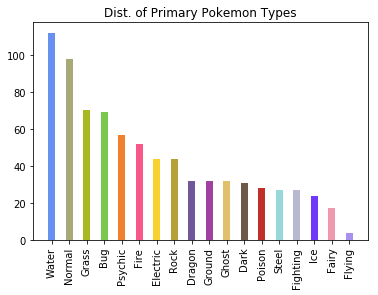

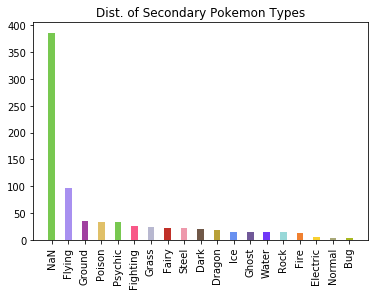

In [6]:
type1_colours= ['#6890F0',  # Water
                    '#A8A878',  # Normal
                    '#A8B820',  # Bug
                    '#78C850',  # Grass
                    '#F08030',  # Fire
                    '#F85888',  # Psychic
                    '#F8D030',  # Electric
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#A040A0',  # Poison
                    '#E0C068',  # Ground
                    '#705848',  # Dark
                    '#C03028',  # Fighting
                    '#98D8D8',  # Ice
                    '#B8B8D0',  # Steel
                    '#7038F8',  # Dragon
                    '#EE99AC',  # Fairy
                    '#A890F0',  # Flying
                   ]

type2_colours= ['#78C850',  #None
                '#A890F0',  # Flying
                '#A040A0',  # Poison
                '#E0C068',  # Ground
                '#78C850',  # Grass
                '#F85888',  # Psychic
                '#B8B8D0',  # Steel
                '#C03028',  # Fighting
                '#EE99AC',  # Fairy
                '#705848',  # Dark
                '#B8A038',  # Rock
                '#6890F0',  # Water
                '#705898',  # Ghost
                '#7038F8',  # Dragon
                '#98D8D8',  # Ice
                '#F08030',  # Fire
                '#F8D030',  # Electric
                '#A8A878',  # Normal
                '#A8B820',  # Bug  
                ]


ptypes = pd.value_counts(df['Type1'])
h = [k*2 for k in range(0,ptypes.shape[0])]
plt.bar(h, ptypes.values, color=type1_colours)
plt.xticks(h, ptypes.index, rotation=90)
plt.title('Dist. of Primary Pokemon Types')
plt.show()

ptypes = pd.value_counts(df['Type2'])
h = [k*2 for k in range(0,ptypes.shape[0])]
plt.bar(h, ptypes.values, color=type2_colours)
plt.xticks(h, ptypes.index, rotation=90)
plt.title('Dist. of Secondary Pokemon Types')
plt.show()


[Text(0.5, 1.0, 'HeatMap to show Correlation between Base Stats')]

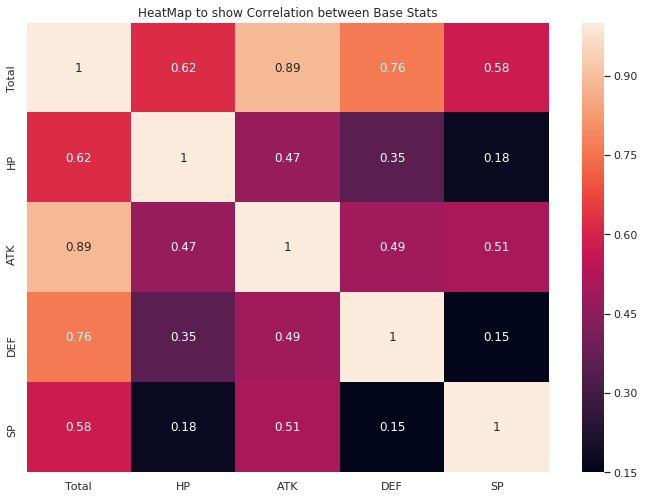

In [7]:
import seaborn as sb

Corr = df[['Total' ,'HP', 'ATK', 'DEF', 'SP']]
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
CorrelationMap = sb.heatmap(Corr.corr(),annot = True, ax = ax)
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')

In [8]:
# dims = (11.7,8.27) #A4 dimensions
# fig, ax = plt.subplots(figsize=dims)
# Defhist = sb.distplot(df['Defense'],color='g',hist=True,ax=ax)
# Atthist = sb.distplot(df['Attack'],color = 'r', hist = True,ax=ax)
# Atthist.set(title = 'Distribution of Defense and Attack', xlabel = 'Defense:g , Attack:r')
# FigHist=Atthist.get_figure()
# FigHist.savefig("HistDvAtt.png")

# # Here, the distribution of both attributes are also similar. Also a positive skew is seen. We can see that there is a significant tail end to the Defense stat as opposed to the Attack stat, portraying that the Defense stat has more Pokemon with high Defense stats than Attack. You could argue that the Defense stat has a higher variance than the Attack stat.

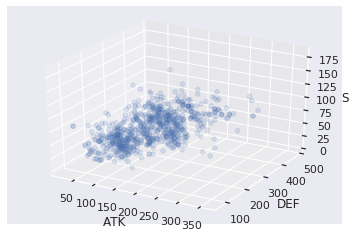

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
df['DEF'] = df['DEF'] + df['HP']
data = [df.ATK.values, df.DEF.values, df.SP.values, df.HP.values]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2], alpha=0.15)
ax.set_xlabel('ATK')
ax.set_ylabel('DEF')
ax.set_zlabel('SP')
# ax.set_zlabel('HP')
# plt.title('Dist. of Secondary Pokemon Types')
plt.show()

In [10]:
# named_pokes = df[['Name']]
# pokes = df[['HP', 'ATK', 'DEF', 'SP']]
# pokes = pokes.values

# scores = []
# for n_clusters in range(2,21):
#     clusterer = KMeans (n_clusters=n_clusters)
#     preds = clusterer.fit_predict(pokes)
#     centers = clusterer.cluster_centers_
# #     print(centers)
# #     print(preds)

#     score = silhouette_score (pokes, preds, metric='euclidean')
#     print ("n_clusters = {}\tscore = {:3.2%}".format(n_clusters, score))
#     scores.append(score)

    
# # # named_pokes
# # named_pokes.values
# # # pd.Series(clusters)
# # # r = pd.concat([pd.Series(named_pokes.values), pd.Series(clusters)], ignore_index=True)
# # # r

In [11]:

# scores

# plt.plot([x for x in range(0, len(scores))], scores)
# plt.title('Silhouette Scores for K-Means Clusters')
# plt.xlabel("Num Clusters")
# plt.ylabel("Silhouette Score")
# plt.show()


/nix/store/l4p8znqa7b99d5n81sswgjq7d09ia7gj-python3.7-matplotlib-3.0.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


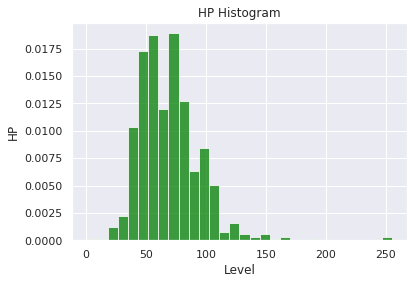

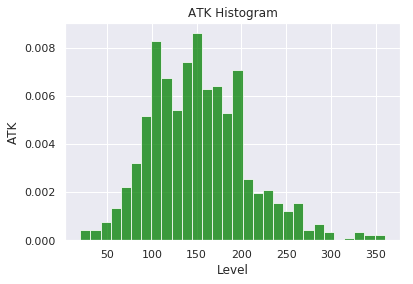

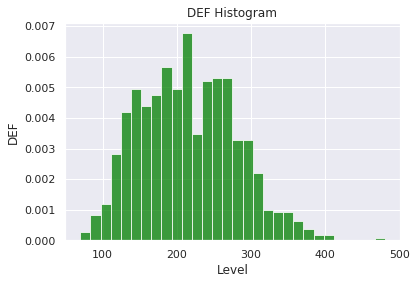

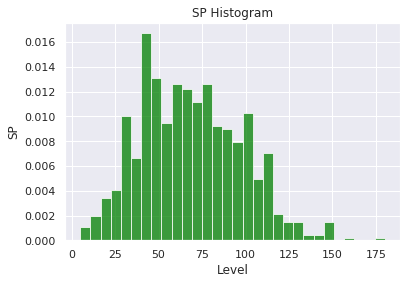

In [12]:

def make_histogram(df, col):
    x = df[col].values
    n, bins, patches = plt.hist(x, 30, normed=1, facecolor='green', alpha=0.75)
    plt.xlabel('Level')
    plt.ylabel(col)
    plt.title(col + ' Histogram')
    plt.grid(True)
    plt.show()

make_histogram(df, 'HP')
make_histogram(df, 'ATK')
make_histogram(df, 'DEF')
make_histogram(df, 'SP')


In [13]:
from statistics import median

def thresholdize(threshold, x):
    t1, t2 = threshold
    if x < t1:
        return "low"
    elif x < t2:
        return "medium"
    else:
        return "high"

def make_scale(col):
    xslice = df[col]
#     x = xslice.values
#     x = sorted(x)
#     print(len(x))
#     print(x[300], x[600])
    
    
    xmin = xslice.min()
    xmax = xslice.max()
    t = (xmax - xmin) / 3
#     m = median(xslice.values)
#     print(xmin, xmin + t, xmin + 2*t, xmax)
    threshold = [xmin + t, xmin + 2*t]
#     threshold = xslice.quantile([.3, .7]).values
#     print(threshold)
    
    df[col+"_level"] = [thresholdize(threshold, x) for x in df[col]]

columns = ['ATK','SP', 'DEF']
for col in columns:
    make_scale(col)

ddf = df[['Name', 'ATK_level','SP_level', 'DEF_level']]
df.head()
ddf.head(7)

QQ = df

In [14]:


def make_nominal_scale(col):
    xslice = df[col]
    df[col+"_weak"] = [True if x == 'low' else False for x in df[col+"_level"]]
    df[col+"_normal"] = [True if x == 'medium' else False for x in df[col+"_level"]]
    df[col+"_strong"] = [True if x == 'high' else False for x in df[col+"_level"]]


def make_almost_nominal_scale(col):
    xslice = df[col]
    df[col+"_weak"] = [True if x == 'low'or x == 'medium' or x == 'high' else False for x in df[col+"_level"]]
    df[col+"_normal"] = [True if x == 'medium' or x == 'high' else False for x in df[col+"_level"]]
    df[col+"_strong"] = [True if x == 'high' else False for x in df[col+"_level"]]
    
columns = ['ATK','DEF','SP']
for col in columns:
#     make_nominal_scale(col)
    make_almost_nominal_scale(col)

df.head()


,Name,Type1,Type2,Total,HP,SP,ATK,DEF,Generation,Legendary,...,DEF_level,ATK_weak,ATK_normal,ATK_strong,DEF_weak,DEF_normal,DEF_strong,SP_weak,SP_normal,SP_strong
#,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,45,114,159,1,False,...,low,True,False,False,True,False,False,True,False,False
2,Ivysaur,Grass,Poison,405,60,60,142,203,1,False,...,low,True,True,False,True,False,False,True,False,False
3,Venusaur,Grass,Poison,525,80,80,182,263,1,False,...,medium,True,True,False,True,True,False,True,True,False
3,Mega Venusaur,Grass,Poison,625,80,80,222,323,1,False,...,medium,True,True,False,True,True,False,True,True,False
4,Charmander,Fire,NaN,309,39,65,112,132,1,False,...,low,True,False,False,True,False,False,True,True,False


In [15]:
def create_oal(df, name, colums):
    df = df[colums]

    def clean(word):
        return ''.join(letter for letter in word.lower() if 'a' <= letter <= 'z' or 'A' <= letter <= 'Z')

    s = "" 
    for index, pokemon in df.iterrows():
        vals = pokemon.values
        p = clean(vals[0])

        for i, x in enumerate(vals[1:]):
            if x == True:
                s += p + ':' + colums[i+1] + '\n'

    f = open(name + ".oal", "w")
    f.write(s)
    f.close()
    

In [16]:
# df.to_excel("pokemon_dataset.xlsl")
# df.to_csv("pokemon_dataset.csv")

folder = 'oals/'
# create_oal(df, folder + 'l_hp', ['Name', 'Legendary', 'HP_weak', 'HP_normal', 'HP_strong'])
# create_oal(df, folder + 'l_atk', ['Name', 'Legendary', 'ATK_weak', 'ATK_normal', 'ATK_strong'])
# create_oal(df, folder + 'l_def', ['Name', 'Legendary', 'DEF_weak', 'DEF_normal', 'DEF_strong'])
# create_oal(df, folder + 'l_sp', ['Name', 'Legendary', 'SP_weak', 'SP_normal', 'SP_strong'])

# create_oal(df, folder + 'legendary', ['Name', 'Legendary', 'HP_strong', 'ATK_strong', 'DEF_strong', 'SP_strong'])
# create_oal(df, folder + 'primal', ['Name', 'Primal', 'HP_strong', 'ATK_strong', 'DEF_strong', 'SP_strong'])
# create_oal(df, folder + 'mega', ['Name', 'Mega', 'HP_strong', 'ATK_strong', 'DEF_strong', 'SP_strong'])
# create_oal(df, folder + 'special', ['Name', 'Legendary', 'Primal', 'Mega'])


# create_oal(df, folder + 'l_x_hp', ['Name', 'Legendary', 'HP_x_weak', 'HP_x_normal', 'HP_x_strong'])
# create_oal(df, folder + 'l_x_atk', ['Name', 'Legendary', 'ATK_x_weak', 'ATK_x_normal', 'ATK_x_strong'])
# create_oal(df, folder + 'l_x_def', ['Name', 'Legendary', 'DEF_x_weak', 'DEF_x_normal', 'DEF_x_strong'])
# create_oal(df, folder + 'l_x_sp', ['Name', 'Legendary', 'SP_x_weak', 'SP_x_normal', 'SP_x_strong'])

# create_oal(df, folder + 'x_legendary', ['Name', 'Legendary', 'HP_x_strong', 'ATK_x_strong', 'DEF_x_strong', 'SP_x_strong'])
# create_oal(df, folder + 'x_primal', ['Name', 'Primal', 'HP_x_strong', 'ATK_x_strong', 'DEF_x_strong', 'SP_x_strong'])
# create_oal(df, folder + 'x_mega', ['Name', 'Mega', 'HP_x_strong', 'ATK_x_strong', 'DEF_x_strong', 'SP_x_strong'])




create_oal(df, folder + 'power3', ['Name', 'ATK_strong', 'DEF_strong', 'SP_strong',
                         'ATK_normal', 'DEF_normal', 'SP_normal',
                         'ATK_weak', 'DEF_weak', 'SP_weak',
                        ])


df['Strong'] = df['']
# df2 = df [['Name', 'Legendary', 'Attack_level', 'Defense_level', 'SP_level']]
# df2.to_csv("pokemon_mini.csv")
# df2.head()


KeyError: ''

In [20]:
dff = df[['Name', 'Type1', 'Type2']]
print(dff.head())
# print(dff.shape)
# dff = dff.[df.Type2 != 'NaN']
print(dff.shape)
# print(dff['Type1'].value_counts().index.tolist())
# print(dff['Type2'].value_counts().index.tolist())
ts = ['Water', 'Normal', 'Grass', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying', 'NaN', 'Flying', 'Ground', 'Poison', 'Psychic', 'Fighting', 'Grass', 'Fairy', 'Steel', 'Dark', 'Dragon', 'Ice', 'Ghost', 'Water', 'Rock', 'Fire', 'Electric', 'Normal', 'Bug']

import math
def create_oal_types(df, name, colums):
    df = df[colums]
    print("ok")

    def clean(word):
        return ''.join(letter for letter in word.lower() if 'a' <= letter <= 'z' or 'A' <= letter <= 'Z')

    s = "" 
    for index, pokemon in df.iterrows():
        vals = pokemon.values
        p = clean(vals[0])


#         s += p + ':' + vals[1] + ':' + vals[2] + '\n'
        if vals[1] in ts:
            s += p + ':' + vals[1] + '\n'
        else:
            s += p + ':' + 'Other' + '\n'
        if vals[2] == 'NaN':
            s += p + ':' + 'NoType' + '\n'
        else:
            if vals[2] in ts:
                s += p + ':' + vals[2] + '\n'     
            else:
                s += p + ':' + 'Other' + '\n'

    f = open(name + ".oal", "w")
    f.write(s)
    print(s)
    f.close()

create_oal_types(dff, 'oals/types',['Name', 'Type1', 'Type2'])

            Name  Type1   Type2
#                              
1      Bulbasaur  Grass  Poison
2        Ivysaur  Grass  Poison
3       Venusaur  Grass  Poison
3  Mega Venusaur  Grass  Poison
4     Charmander   Fire     NaN
(800, 3)
ok
bulbasaur:Grass
bulbasaur:Poison
ivysaur:Grass
ivysaur:Poison
venusaur:Grass
venusaur:Poison
megavenusaur:Grass
megavenusaur:Poison
charmander:Fire
charmander:NoType
charmeleon:Fire
charmeleon:NoType
charizard:Fire
charizard:Flying
megacharizardx:Fire
megacharizardx:Dragon
megacharizardy:Fire
megacharizardy:Flying
squirtle:Water
squirtle:NoType
wartortle:Water
wartortle:NoType
blastoise:Water
blastoise:NoType
megablastoise:Water
megablastoise:NoType
caterpie:Bug
caterpie:NoType
metapod:Bug
metapod:NoType
butterfree:Bug
butterfree:Flying
weedle:Bug
weedle:Poison
kakuna:Bug
kakuna:Poison
beedrill:Bug
beedrill:Poison
megabeedrill:Bug
megabeedrill:Poison
pidgey:Normal
pidgey:Flying
pidgeotto:Normal
pidgeotto:Flying
pidgeot:Normal
pidgeot:Flying
megapidgeot:N

In [35]:
# TRIADIC
s = ""
for index, x in df[['Name', 'ATK_strong', 'DEF_strong', 'SP_strong', 'Generation']].iterrows():
    a, b, c, d, e = x
#     e = "Legendary" if c == True else "Basic"
    b = "Strong_ATK" if b == True else None
    c = "Strong_DEF" if c == True else None
    d = "Strong_SP" if d == True else None
    e = "Gen" + str(e)
    if b:
        s += a + ',' + e + ',' + b + '\n'
    if c:
        s += a + ',' + e + ',' + c + '\n'
    if d:
        s += a + ',' + e + ',' + d + '\n'
    
    
    
print(s[:100])
f = open("pokemon_triadic3.csv", "w")
f.write(s)
f.close()


Mega Charizard X,Gen1,Strong_ATK
Mega Charizard Y,Gen1,Strong_ATK
Mega Beedrill,Gen1,Strong_SP
Mega 
